In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.seasonal import seasonal_decompose

In [69]:
df = pd.read_csv('Data_input_2.csv', parse_dates=['Date'], index_col='Date')
print(df.shape)
df.head()

(1239, 5)


,Close/Last,SMA,MACD,Signal_Line,RSI
Date,,,,,
2024-05-30,10205.24,10283.5305,97.144368,99.123486,57.155972
2024-05-29,10396.40,10257.8745,122.489392,99.618265,66.767226
2024-05-28,10526.85,10230.3385,133.593631,93.900484,75.571463
2024-05-24,10549.22,10205.9780,132.541316,83.977197,74.341863
2024-05-23,10495.82,10181.2985,126.992633,71.836167,76.381399


In [70]:
data = df.iloc[::-1]
data.rename(columns = {'Close/Last':'Close'}, inplace = True)
data.head()

,Close,SMA,MACD,Signal_Line,RSI
Date,,,,,
2019-06-28,4660.72,4481.3010,99.321197,90.056725,61.707838
2019-07-01,4766.31,4511.1155,109.460715,93.937523,67.217516
2019-07-02,4747.96,4532.4645,114.693548,98.088728,71.051746
2019-07-03,4773.91,4554.6995,119.556383,102.382259,71.499561
2019-07-05,4757.68,4573.8110,120.709130,106.047633,77.083139


In [71]:
data.isnull().sum()

Close          0
SMA            0
MACD           0
Signal_Line    0
RSI            0
dtype: int64

# Trực quan hóa dữ liệu

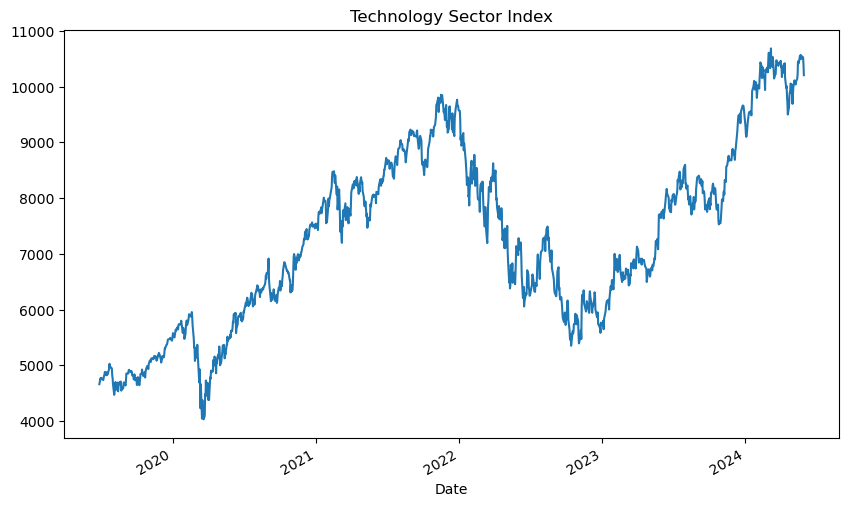

In [72]:
data['Close'].plot(figsize=(10, 6))
plt.title('Technology Sector Index')
plt.show()

In [73]:
# rolling_window = 30
# f, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# sns.lineplot(x=data.index, y=data.Close, ax=ax[0, 0], color='indianred')
# sns.lineplot(x=data.index, y=data.Close.rolling(rolling_window).mean(), ax=ax[0, 0], color='green', label='rolling mean')
# sns.lineplot(x=data.index, y=data.Close.rolling(rolling_window).std(), ax=ax[0, 0], color='blue', label='rolling std')
# ax[0, 0].set_title('Close', fontsize=14)
# ax[0, 0].set_ylabel(ylabel='Close', fontsize=14)

# sns.lineplot(x=data.index, y=data.COMP, ax=ax[0, 1], color='indianred')
# sns.lineplot(x=data.index, y=data.COMP.rolling(rolling_window).mean(), ax=ax[0, 1], color='green', label='rolling mean')
# sns.lineplot(x=data.index, y=data.COMP.rolling(rolling_window).std(), ax=ax[0, 1], color='blue', label='rolling std')
# ax[0, 1].set_title('COMP', fontsize=14)
# ax[0, 1].set_ylabel(ylabel='COMP', fontsize=14)

# sns.lineplot(x=data.index, y=data.NATS, ax=ax[1, 0], color='indianred')
# sns.lineplot(x=data.index, y=data.NATS.rolling(rolling_window).mean(), ax=ax[1, 0], color='green', label='rolling mean')
# sns.lineplot(x=data.index, y=data.NATS.rolling(rolling_window).std(), ax=ax[1, 0], color='blue', label='rolling std')
# ax[1, 0].set_title('NATS', fontsize=14)
# ax[1, 0].set_ylabel(ylabel='NATS', fontsize=14)

# sns.lineplot(x=data.index, y=data.MSCI, ax=ax[1, 1], color='indianred')
# sns.lineplot(x=data.index, y=data.MSCI.rolling(rolling_window).mean(), ax=ax[1, 1], color='green', label='rolling mean')
# sns.lineplot(x=data.index, y=data.MSCI.rolling(rolling_window).std(), ax=ax[1, 1], color='blue', label='rolling std')
# ax[1, 1].set_title('MSCI', fontsize=14)
# ax[1, 1].set_ylabel(ylabel='MSCI', fontsize=14)

Trend/Season Decompose

In [74]:
# fig_2, ax_2 = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16, 8))

# ax_2[0,0].set_title('Decomposition of Close', fontsize=16)
# res = seasonal_decompose(data['Close'], period = 365, model='additive', extrapolate_trend='freq')

# res.observed.plot(ax=ax_2[0,0], legend=False, color='dodgerblue')
# ax_2[0,0].set_ylabel('Observed', fontsize=14)
# # ax_2[0,0].set_ylim([-5, 35])

# res.trend.plot(ax=ax_2[1,0], legend=False, color='dodgerblue')
# ax_2[1,0].set_ylabel('Trend', fontsize=14)
# # ax_2[1,0].set_ylim([-5, 35])

# res.seasonal.plot(ax=ax_2[2,0], legend=False, color='dodgerblue')
# ax_2[2,0].set_ylabel('Seasonal', fontsize=14)
# # ax_2[2,0].set_ylim([-15, 15])

# res.resid.plot(ax=ax_2[3,0], legend=False, color='dodgerblue')
# ax_2[3,0].set_ylabel('Residual', fontsize=14)
# # ax_2[3,0].set_ylim([-15, 15])

# ax_2[0, 1].set_title('Decomposition of COMP', fontsize=16)
# res_comp = seasonal_decompose(data['COMP'], period = 365, model='additive', extrapolate_trend='freq')

# res_comp.observed.plot(ax=ax_2[0, 1], legend=False, color='dodgerblue')
# ax_2[0, 1].set_ylabel('Observed', fontsize=14)

# res_comp.trend.plot(ax=ax_2[1, 1], legend=False, color='dodgerblue')
# ax_2[1, 1].set_ylabel('Trend', fontsize=14)

# res_comp.seasonal.plot(ax=ax_2[2, 1], legend=False, color='dodgerblue')
# ax_2[2, 1].set_ylabel('Seasonal', fontsize=14)

# res_comp.resid.plot(ax=ax_2[3, 1], legend=False, color='dodgerblue')
# ax_2[3, 1].set_ylabel('Residual', fontsize=14)

# plt.show()

In [75]:
# fig_2, ax_2 = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16, 8))

# ax_2[0,0].set_title('Decomposition of NATS', fontsize=16)
# res = seasonal_decompose(data['NATS'], period = 365, model='additive', extrapolate_trend='freq')

# res.observed.plot(ax=ax_2[0,0], legend=False, color='dodgerblue')
# ax_2[0,0].set_ylabel('Observed', fontsize=14)


# res.trend.plot(ax=ax_2[1,0], legend=False, color='dodgerblue')
# ax_2[1,0].set_ylabel('Trend', fontsize=14)


# res.seasonal.plot(ax=ax_2[2,0], legend=False, color='dodgerblue')
# ax_2[2,0].set_ylabel('Seasonal', fontsize=14)


# res.resid.plot(ax=ax_2[3,0], legend=False, color='dodgerblue')
# ax_2[3,0].set_ylabel('Residual', fontsize=14)


# ax_2[0, 1].set_title('Decomposition of MSCI', fontsize=16)
# res_comp = seasonal_decompose(data['MSCI'], period = 365, model='additive', extrapolate_trend='freq')

# res_comp.observed.plot(ax=ax_2[0, 1], legend=False, color='dodgerblue')
# ax_2[0, 1].set_ylabel('Observed', fontsize=14)

# res_comp.trend.plot(ax=ax_2[1, 1], legend=False, color='dodgerblue')
# ax_2[1, 1].set_ylabel('Trend', fontsize=14)

# res_comp.seasonal.plot(ax=ax_2[2, 1], legend=False, color='dodgerblue')
# ax_2[2, 1].set_ylabel('Seasonal', fontsize=14)

# res_comp.resid.plot(ax=ax_2[3, 1], legend=False, color='dodgerblue')
# ax_2[3, 1].set_ylabel('Residual', fontsize=14)

# plt.show()

# Kiểm định nhân quả

In [76]:
from statsmodels.tsa.stattools import grangercausalitytests

In [77]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables = data.columns)

d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
d:\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
d:\anaconda3\Lib\site-packages\statsmodel

,Close_x,SMA_x,MACD_x,Signal_Line_x,RSI_x
Close_y,1.000,0.0313,0.0091,0.0223,0.0394
SMA_y,0.000,1.0000,0.0000,0.0000,0.0000
MACD_y,0.001,0.0007,1.0000,0.0000,0.0000
Signal_Line_y,0.000,0.0000,0.0000,1.0000,0.0000
RSI_y,0.000,0.0000,0.0000,0.0000,1.0000


# Train test split

In [78]:
n_test = 22
train_data, test_data = data[:-n_test], data[-n_test:]
print(train_data.shape)
print(test_data.shape)

(1217, 5)
(22, 5)


# Kiểm định tính dừng với ADF test và sai phân

In [79]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    # print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    # print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    # print(f' Significance Level    = {signif}')
    # print(f' Test Statistic        = {output["test_statistic"]}')
    # print(f' No. Lags Chosen       = {output["n_lags"]}')

    # for key,val in r[4].items():
    #     print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [80]:
for name, column in train_data.items():
    adfuller_test(column, name=column.name)
    print('\n')

 => P-Value = 0.6967. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 => P-Value = 0.6548. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 => P-Value = 0.0003. Rejecting Null Hypothesis.
 => Series is Stationary.


 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




Sai phân dữ liệu

In [81]:
# train_data_diff = train_data.diff()
# train_data_diff = train_data_diff.dropna()
# train_data_diff.head()

In [82]:
# for name, column in train_data_diff.items():
#     adfuller_test(column, name=column.name)
#     print('\n')

# Dự báo tuyến tính lùi (Sử dụng trong trường hợp các chuỗi dừng với sai phân khác nhau)

In [83]:
def cal_gamma_0(n, array):
  gamma_0 = 0
  for i in range(n):
    temp = array[i] * array[i]
    gamma_0 += temp
  gamma_0 = gamma_0 / n
  return gamma_0
def cal_gamma_1(n, array):
  gamma_1 = 0
  for i in range(n - 1):
    temp = array[i] * array[i + 1]
    gamma_1 += temp
  gamma_1 = gamma_1 / n
  return gamma_1
def cal_gamma_2(n, array):
  gamma_2 = 0
  for i in range(n - 2):
    temp = array[i] * array[i + 2]
    gamma_2 += temp
  gamma_2 = gamma_2 / n
  return gamma_2
def cal_gamma_3(n, array):
  gamma_3 = 0
  for i in range(n - 3):
    temp = array[i] * array[i + 3]
    gamma_3 += temp
  gamma_3 = gamma_3 / n
  return gamma_3
def theta_3steps(gamma_0, gamma_1, gamma_2, gamma_3):
  Theta = np.zeros((3,1))
  Gamma = np.zeros((3,3))
  gamma = np.zeros((3,1))
  Gamma[0,0] = gamma_0
  Gamma[0,1] = gamma_1
  Gamma[0,2] = gamma_2
  Gamma[1,0] = gamma_1
  Gamma[1,1] = gamma_0
  Gamma[1,2] = gamma_1
  Gamma[2,0] = gamma_2
  Gamma[2,1] = gamma_1
  Gamma[2,2] = gamma_0
  gamma[0,0] = gamma_1
  gamma[1,0] = gamma_2
  gamma[2,0] = gamma_3
  Theta = np.dot(np.linalg.inv(Gamma), gamma)
  return Theta
def predict_prev(array):
  mean = np.mean(array)
  n = len(array)
  array = array - mean
  gamma_0 = cal_gamma_0(n, array)
  gamma_1 = cal_gamma_1(n, array)
  gamma_2 = cal_gamma_2(n, array)
  gamma_3 = cal_gamma_3(n, array)
  Theta = theta_3steps(gamma_0, gamma_1 , gamma_2, gamma_3)
  predict = Theta[0,0] * array[0] + Theta[1,0] * array[1] + Theta[2,0] * array[2] + mean
  return predict

In [84]:
train_data_diff = pd.DataFrame()
train_data_diff['Close'] = train_data['Close'].diff()
train_data_diff['SMA'] = train_data['SMA'].diff()
train_data_diff['MACD'] = train_data['MACD']
train_data_diff['Signal_Line'] = train_data['Signal_Line']
train_data_diff['RSI'] = train_data['RSI']
train_data_diff.head()

,Close,SMA,MACD,Signal_Line,RSI
Date,,,,,
2019-06-28,NaN,NaN,99.321197,90.056725,61.707838
2019-07-01,105.59,29.8145,109.460715,93.937523,67.217516
2019-07-02,-18.35,21.3490,114.693548,98.088728,71.051746
2019-07-03,25.95,22.2350,119.556383,102.382259,71.499561
2019-07-05,-16.23,19.1115,120.709130,106.047633,77.083139


In [85]:
columns = ['Close', 'SMA'] #Tên chuỗi cần bù giá trị
predicted_data = {}

for column in columns:
  array_column = train_data_diff[column].to_numpy()
  predicted_data[column] = predict_prev(array_column[1:])
  train_data_diff[column].iloc[0] = predicted_data[column]
train_data_diff.head()


,Close,SMA,MACD,Signal_Line,RSI
Date,,,,,
2019-06-28,-5.393977,27.524598,99.321197,90.056725,61.707838
2019-07-01,105.590000,29.814500,109.460715,93.937523,67.217516
2019-07-02,-18.350000,21.349000,114.693548,98.088728,71.051746
2019-07-03,25.950000,22.235000,119.556383,102.382259,71.499561
2019-07-05,-16.230000,19.111500,120.709130,106.047633,77.083139


In [86]:
for name, column in train_data_diff.items():
    adfuller_test(column, name=column.name)
    print('\n')

 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 => P-Value = 0.0003. Rejecting Null Hypothesis.
 => Series is Stationary.


 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




In [87]:
grangers_causation_matrix(train_data_diff, variables = data.columns)

d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
d:\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
d:\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
d:\anaconda3\Lib\site-packages\statsmodel

,Close_x,SMA_x,MACD_x,Signal_Line_x,RSI_x
Close_y,1.0000,0.0385,0.0166,0.0171,0.0482
SMA_y,0.0001,1.0000,0.0000,0.0000,0.0000
MACD_y,0.0000,0.0000,1.0000,0.0000,0.0000
Signal_Line_y,0.0000,0.0000,0.0000,1.0000,0.0000
RSI_y,0.0000,0.0001,0.0000,0.0000,1.0000


# Huấn luyện mô hình

In [88]:
model = VAR(train_data_diff)
x = model.select_order(maxlags=12)
x.summary()

d:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,35.44,35.46,2.467e+15,35.45
1,-13.38,-13.25,1.548e-06,-13.33
2,-47.08*,-46.85*,3.572e-21*,-46.99*
3,-41.15,-40.81,1.348e-18,-41.02
4,-40.24,-39.80,3.328e-18,-40.08
5,-37.93,-37.38,3.352e-17,-37.73
6,-38.00,-37.34,3.144e-17,-37.75
7,-37.55,-36.79,4.941e-17,-37.26
8,-36.92,-36.05,9.250e-17,-36.59
9,-37.59,-36.61,4.752e-17,-37.22


In [89]:
model_train = model.fit(2)
model_train.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 19, Jun, 2024
Time:                     21:48:03
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -46.2914
Nobs:                     1215.00    HQIC:                  -46.4354
Log likelihood:           19697.3    FPE:                6.24571e-21
AIC:                     -46.5224    Det(Omega_mle):     5.74510e-21
--------------------------------------------------------------------
Results for equation Close
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    1.963884        28.113317            0.070           0.944
L1.Close                -0.045536         0.080946           -0.563           0.574
L1.SMA                  -0.292544         0.6486

# Kiểm tra tương quan phần dư

Sử dụng kiểm định Durbin Watson
Nếu có tương quan (giá trị gần 0 hoặc 4) cần tăng bậc mô hình hoặc đổi mô hình.
Nếu gần 2 thì không có tương quan

In [90]:
from statsmodels.stats.stattools import durbin_watson

In [91]:
def adjust(val, length= 6): return str(val).ljust(length)
residual = durbin_watson(model_train.resid)

for col, val in zip(data.columns, residual):
    print(adjust(col), ':', round(val, 2))

Close  : 2.0
SMA    : 2.01
MACD   : 2.0
Signal_Line : 2.0
RSI    : 2.02


# Dự báo

In [92]:
lag_order = model_train.k_ar
forecast_input = train_data_diff.values[-lag_order:]
forecast_input

array([[ 161.7       ,  -18.235     , -122.9908745 , -116.8930695 ,
          43.56992413],
       [ -15.99      ,  -21.203     , -105.9106495 , -114.6965855 ,
          40.48357818]])

Dự báo đa bước

In [93]:
fc = model_train.forecast(y=forecast_input, steps=len(test_data))
forecast_data = pd.DataFrame(fc, index=data.index[-len(test_data):], columns=data.columns)
forecast_data

,Close,SMA,MACD,Signal_Line,RSI
Date,,,,,
2024-04-30,2.211775,-19.375231,-91.145310,-109.986330,43.400826
2024-05-01,1.660666,-17.220245,-78.405858,-103.670236,46.688287
2024-05-02,3.845684,-13.994691,-67.224512,-96.381091,49.924586
2024-05-03,-11.907595,-11.897056,-58.648002,-88.834473,51.201681
2024-05-06,21.904787,-6.802401,-49.512770,-80.970133,55.228179
2024-05-07,-7.310501,-4.963341,-42.374464,-73.250999,55.826968
2024-05-08,15.072111,-1.346431,-35.096540,-65.620107,57.883777
2024-05-09,-2.218767,0.125019,-29.171499,-58.330386,57.915527
2024-05-10,-2.012781,1.383224,-24.357497,-51.535808,57.557605


Dự báo một bước

In [94]:
# test_data_diff = pd.DataFrame()
# test_data_diff['Close'] = test_data['Close'].diff()
# test_data_diff['SMA'] = test_data['SMA'].diff()
# test_data_diff['MACD'] = test_data['MACD']
# test_data_diff['Signal_Line'] = test_data['Signal_Line']
# test_data_diff['RSI'] = test_data['RSI']
# columns = ['Close', 'SMA'] #Tên chuỗi cần bù giá trị
# predicted_data = {}

# for column in columns:
#   array_column = test_data_diff[column].to_numpy()
#   predicted_data[column] = predict_prev(array_column[1:])
#   test_data_diff[column].iloc[0] = predicted_data[column]

In [95]:

# fc_multi = np.empty((22,5))
# forecast_multi = forecast_input
# for i in range(len(test_data)):
#     fc_multi_i = model_train.forecast(y=forecast_multi, steps=1)
#     fc_multi[i] = fc_multi_i
#     forecast_multi = forecast_multi[1:,:]
#     new_row = test_data_diff.iloc[i].to_numpy().reshape(1, -1)
#     forecast_multi = np.vstack((forecast_multi, new_row))
# forecast_data = pd.DataFrame(fc_multi, index=data.index[-len(test_data):], columns=data.columns)
# forecast_data.head()

In [96]:
forecast_data_all = pd.concat([train_data_diff, forecast_data], ignore_index=True)
# new_row = pd.DataFrame([[0, 0, 0, 0]], columns=data.columns)
# forecast_data_all = pd.concat([new_row, forecast_data_all], ignore_index=True)
forecast_data_all['Close'].iloc[0] = 0
forecast_data_all['SMA'].iloc[0] = 0
forecast_data_all.head()

,Close,SMA,MACD,Signal_Line,RSI
0,0.00,0.0000,99.321197,90.056725,61.707838
1,105.59,29.8145,109.460715,93.937523,67.217516
2,-18.35,21.3490,114.693548,98.088728,71.051746
3,25.95,22.2350,119.556383,102.382259,71.499561
4,-16.23,19.1115,120.709130,106.047633,77.083139


In [97]:
forecast_data_all_return = pd.DataFrame()
forecast_data_all_return['Close'] = forecast_data_all['Close'].cumsum() + data['Close'].iloc[0]
forecast_data_all_return['SMA'] = forecast_data_all['SMA'].cumsum() + data['SMA'].iloc[0]
forecast_data_all_return['MACD'] = forecast_data_all['MACD']
forecast_data_all_return['Signal_Line'] = forecast_data_all['Signal_Line']
forecast_data_all_return['RSI'] = forecast_data_all['RSI']
forecast_data_all_return.set_index(data.index, inplace=True)
forecast_data_all_return.head()

,Close,SMA,MACD,Signal_Line,RSI
Date,,,,,
2019-06-28,4660.72,4481.3010,99.321197,90.056725,61.707838
2019-07-01,4766.31,4511.1155,109.460715,93.937523,67.217516
2019-07-02,4747.96,4532.4645,114.693548,98.088728,71.051746
2019-07-03,4773.91,4554.6995,119.556383,102.382259,71.499561
2019-07-05,4757.68,4573.8110,120.709130,106.047633,77.083139


In [98]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [99]:
mape_close = mean_absolute_percentage_error(test_data['Close'], forecast_data_all_return['Close'][-n_test:]) 
mape_close

0.021619807739400757

In [100]:
mse_close = mean_squared_error(test_data['Close'], forecast_data_all_return['Close'][-n_test:])
rmse_close = np.sqrt(mse_close)
rmse_close

274.4386027615185

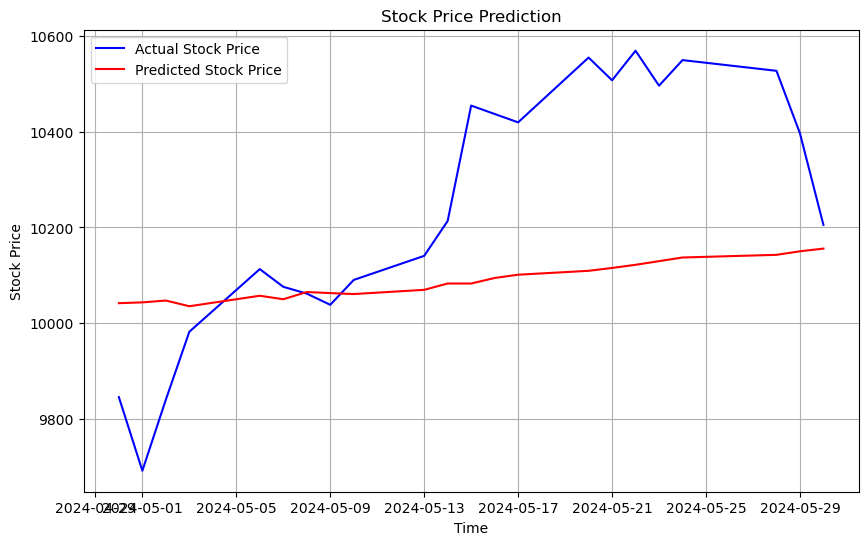

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['Close'], color='blue', label='Actual Stock Price')
plt.plot(forecast_data_all_return['Close'][-n_test:], color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Lưu mô hình

In [102]:
# model_train.save('VARTechnical.pkl')

In [103]:
# np.save('forecast_tech.npy', forecast_input)